In [1]:
import pandas as pd


In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
df =pd.DataFrame(iris.data,columns = iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [10]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

## Sepal length vs sepal width (setosa vs versicolor)

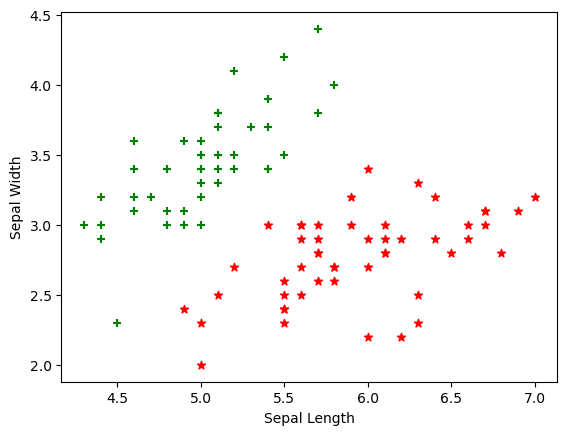

In [12]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color ="green",marker = '+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color ="red",marker = '*')

## Petal length vs petal width (setosa vs versicolor)

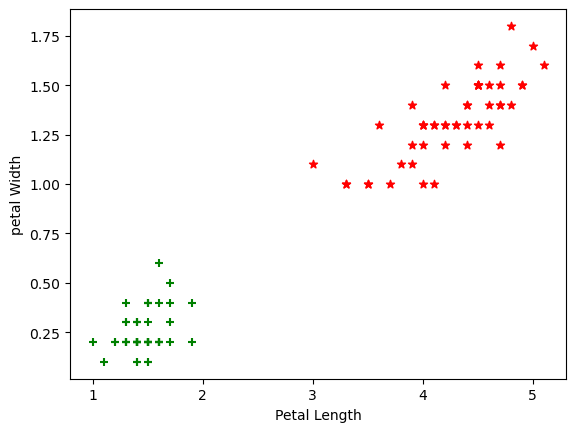

In [13]:
plt.xlabel('Petal Length')
plt.ylabel('petal Width')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color = "green",marker = '+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color = "red",marker = '*')


## train - test -split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = df.drop(['target','flower_name'],axis =1)
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [17]:
y = df['target']
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2)

## svc

In [21]:
from sklearn.svm import SVC

In [22]:
model = SVC()

In [23]:
model.fit(X_train,y_train)

SVC()

In [24]:
model.score(X_test,y_test)

0.9333333333333333

In [25]:
model.predict([[4.8,3.0,1.5,0.3]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

## Tune parameter
    ## 1. Regularization (C)

In [33]:
model_C =SVC(C=1)
model_C.fit(X_train,y_train)

SVC(C=1)

In [34]:
model_C.score(X_test,y_test)

0.9333333333333333

In [35]:
model_C = SVC(C = 10)

In [36]:
model_C.fit(X_train,y_train)

SVC(C=10)

In [37]:
model_C.score(X_test,y_test)

0.9666666666666667

#### 2. Gamma

In [41]:
model_G = SVC(gamma =10)

In [42]:
model_G.fit(X_train,y_train)

SVC(gamma=10)

In [43]:
model_G.score(X_test,y_test)

0.9333333333333333

#### 3. Kernel

In [44]:
model_linear_kernal = SVC(kernel = 'linear')

In [ ]:
model_